In [49]:
import pandas as pd
import numpy as np
from IPython.display import Audio

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


In [14]:
def load_csv_dataset():
    
    data = pd.read_csv('../data/features_30_sec.csv')
    classes = data[["label"]]
    features = data.drop(['filename', 'label'], axis=1)
    
    encoder = LabelEncoder()
    classes = encoder.fit_transform(classes.values.ravel())
    classes = to_categorical(classes)
    
    return features, classes

In [15]:
X, y = load_csv_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               30208     
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
6/6 [==============================] - 1s 25ms/step - loss: 2.2700 - accuracy: 0.1743 - val_loss: 2.0376 - val_accuracy: 0.3667
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 2.0161 - accuracy: 0.3229 - val_loss: 1.7901 - val_accuracy: 0.3767
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 1.8177 - accuracy: 0.3600 - val_loss: 1.5946 - val_accuracy: 0.4233
Epoch 4/200
6/6 [==============================] - 0s 8ms/step - loss: 1.6405 - accuracy: 0.4143 - val_loss: 1.4709 - val_accuracy: 0.4700
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 1.6060 - accuracy: 0.4314 - val_loss: 1.3882 - val_accuracy: 0.4867
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 1.5086 - accuracy: 0.4629 - val_loss: 1.3360 - val_accuracy: 0.4967
Epoch 7/200
6/6 [==============================] - 0s 7ms/step - loss: 1.3800 - accuracy: 0.5014 - val_loss: 1.2667 - val_accuracy: 0.5200
Epoch 8/200
6/6 [=========

6/6 [==============================] - 0s 10ms/step - loss: 0.0832 - accuracy: 0.9757 - val_loss: 1.3341 - val_accuracy: 0.7467
Epoch 60/200
6/6 [==============================] - 0s 10ms/step - loss: 0.1085 - accuracy: 0.9643 - val_loss: 1.3572 - val_accuracy: 0.7500
Epoch 61/200
6/6 [==============================] - 0s 9ms/step - loss: 0.0930 - accuracy: 0.9686 - val_loss: 1.3408 - val_accuracy: 0.7567
Epoch 62/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1327 - accuracy: 0.9557 - val_loss: 1.3298 - val_accuracy: 0.7767
Epoch 63/200
6/6 [==============================] - 0s 9ms/step - loss: 0.1157 - accuracy: 0.9557 - val_loss: 1.3349 - val_accuracy: 0.7667
Epoch 64/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1188 - accuracy: 0.9729 - val_loss: 1.3753 - val_accuracy: 0.7433
Epoch 65/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1110 - accuracy: 0.9643 - val_loss: 1.3007 - val_accuracy: 0.7433
Epoch 66/200
6/6 [=============

6/6 [==============================] - 0s 7ms/step - loss: 0.0534 - accuracy: 0.9757 - val_loss: 1.6041 - val_accuracy: 0.7400
Epoch 118/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0383 - accuracy: 0.9929 - val_loss: 1.5861 - val_accuracy: 0.7467
Epoch 119/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0209 - accuracy: 0.9943 - val_loss: 1.5705 - val_accuracy: 0.7467
Epoch 120/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0347 - accuracy: 0.9900 - val_loss: 1.5508 - val_accuracy: 0.7733
Epoch 121/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0292 - accuracy: 0.9943 - val_loss: 1.6013 - val_accuracy: 0.7567
Epoch 122/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0382 - accuracy: 0.9900 - val_loss: 1.6485 - val_accuracy: 0.7533
Epoch 123/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0317 - accuracy: 0.9929 - val_loss: 1.6658 - val_accuracy: 0.7400
Epoch 124/200
6/6 [========

6/6 [==============================] - 0s 7ms/step - loss: 0.0173 - accuracy: 0.9943 - val_loss: 1.7419 - val_accuracy: 0.7567
Epoch 176/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0187 - accuracy: 0.9943 - val_loss: 1.7238 - val_accuracy: 0.7467
Epoch 177/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0351 - accuracy: 0.9929 - val_loss: 1.6007 - val_accuracy: 0.7400
Epoch 178/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0149 - accuracy: 0.9943 - val_loss: 1.5993 - val_accuracy: 0.7500
Epoch 179/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0117 - accuracy: 0.9971 - val_loss: 1.6862 - val_accuracy: 0.7567
Epoch 180/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0266 - accuracy: 0.9929 - val_loss: 1.7392 - val_accuracy: 0.7500
Epoch 181/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 0.9929 - val_loss: 1.7010 - val_accuracy: 0.7500
Epoch 182/200
6/6 [========

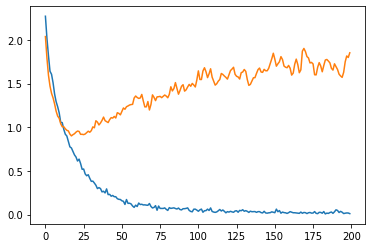

In [20]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)

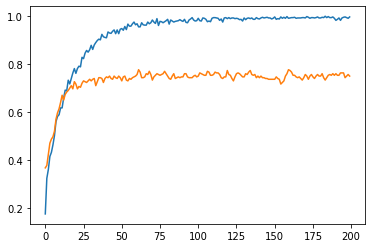

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)

In [22]:
model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 2ms/step - loss: 1.8518 - accuracy: 0.7500


[1.8518279790878296, 0.75]

In [23]:
y_pred = model.predict(X_test)
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

array([[24,  0,  0,  0,  1,  0,  2,  0,  0,  3],
       [ 0, 25,  1,  0,  0,  4,  0,  0,  0,  0],
       [ 2,  1, 20,  0,  0,  2,  2,  0,  2,  1],
       [ 1,  1,  0, 17,  1,  0,  3,  3,  2,  2],
       [ 1,  0,  0,  1, 20,  0,  2,  0,  6,  0],
       [ 0,  1,  1,  0,  0, 28,  0,  0,  0,  0],
       [ 4,  0,  0,  1,  0,  0, 25,  0,  0,  0],
       [ 0,  1,  1,  0,  1,  0,  0, 24,  3,  0],
       [ 1,  0,  0,  3,  0,  0,  1,  0, 24,  1],
       [ 1,  0,  4,  3,  1,  0,  1,  0,  2, 18]])

In [37]:
path = '../data/images_original'

In [38]:
def load_image_dataset():
    
    imgs = keras.utils.image_dataset_from_directory(path, labels='inferred', color_mode='rgb', batch_size=1000)

    images = []
    labels = []
    for (i, l) in imgs.as_numpy_iterator():
        images = i / 255
        labels = to_categorical(l)
        
    return images, labels

Found 999 files belonging to 10 classes.


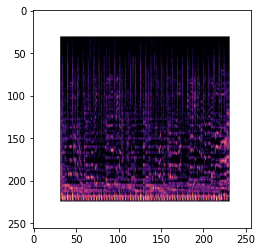

In [39]:
images, labels = load_image_dataset()
plt.imshow(images[0])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, stratify=labels)

In [41]:
input_shape = X_train.shape[1:]
num_classes = 10

In [42]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 32)       

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
22/22 [==============================] - 24s 1s/step - loss: 2.5591 - accuracy: 0.1102 - val_loss: 2.2766 - val_accuracy: 0.1067
Epoch 2/20
22/22 [==============================] - 27s 1s/step - loss: 2.2454 - accuracy: 0.1617 - val_loss: 2.1713 - val_accuracy: 0.2533
Epoch 3/20
22/22 [==============================] - 28s 1s/step - loss: 2.1301 - accuracy: 0.2217 - val_loss: 2.0756 - val_accuracy: 0.2433
Epoch 4/20
22/22 [==============================] - 27s 1s/step - loss: 1.9839 - accuracy: 0.2618 - val_loss: 1.8888 - val_accuracy: 0.3467
Epoch 5/20
22/22 [==============================] - 28s 1s/step - loss: 1.8218 - accuracy: 0.3448 - val_loss: 1.7031 - val_accuracy: 0.3467
Epoch 6/20
22/22 [==============================] - 28s 1s/step - loss: 1.5866 - accuracy: 0.4120 - val_loss: 1.7103 - val_accuracy: 0.4000
Epoch 7/20
22/22 [==============================] - 28s 1s/step - loss: 1.4628 - accuracy: 0.4936 - val_loss: 1.6142 - val_accuracy: 0.3700
Epoch 8/20
22/22 [==

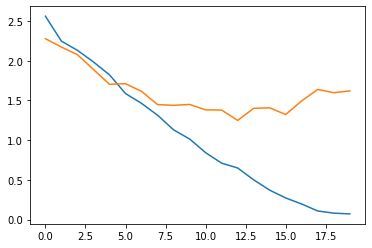

In [45]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)

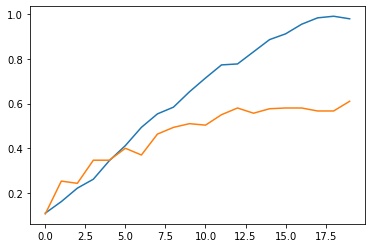

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)

In [47]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 3s 264ms/step - loss: 1.6189 - accuracy: 0.6100


[1.6189062595367432, 0.6100000143051147]

In [48]:
y_pred = model.predict(X_test)
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

array([[19,  2,  4,  1,  0,  1,  1,  0,  1,  1],
       [ 0, 28,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 3,  0, 15,  3,  0,  5,  0,  1,  1,  2],
       [ 1,  1,  3, 12,  1,  3,  0,  3,  4,  2],
       [ 0,  0,  0,  0, 16,  0,  0,  2,  9,  3],
       [ 3,  2,  1,  1,  0, 23,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 26,  0,  0,  3],
       [ 1,  0,  0,  3,  4,  2,  0, 16,  1,  3],
       [ 6,  1,  0,  0,  1,  0,  0,  1, 21,  0],
       [ 1,  1, 13,  1,  1,  2,  4,  0,  0,  7]])

In [ ]:
Audio('../data/genres_original/hiphop/hiphop.00035.wav')